In [45]:
%matplotlib inline

import math as m
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from os import listdir
from global_var import COLORS

yellow='#ffb200'
red='#DD5544'
blue='#0284C0'

In [81]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 16})

In [47]:
def plot_spectra(folder, name):
    with open(folder + '/' + name +'.txt') as f:
        loadfile = f.read()
        data = []
    for lf in loadfile.split('\n')[:-1]:     
        row = [float(j) for j in lf.split('\t')]

        data.append([row[0]] + row[1::2])

    data = np.matrix(data)

    with open(folder + '/' +name +'Log.txt') as f:
        loadfile = f.read()
        columns = [lf[11:-6] for lf in loadfile.split('\n')[:-1]]
        columns = ['wavelength [nm]']+ columns[1::2]
        
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 1, 1])
    axes.grid(linestyle='--')
    axes.set_title(name)
    axes.set_xlabel('$\\lambda$ [nm]')
    axes.set_ylabel('intensity [a. u.]')
    axes.set_ylim([-0.1, 1.2])

    for i in range(1, data.shape[1]):
        axes.plot(data[:,0], data[:,i], linewidth=2, label = columns[i])

    lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

    fig.savefig(folder + '/' + name +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')   
    
def plot_folder(folder):
    files = listdir(folder)
    files = [file[:-7] for file in files if 'Log' in file]
    print(files)
    for file in files[:]:
        try:
            plot_spectra(folder, file)
        except:
            print('{} failed'.format(file))

In [3]:
def data_spectra(folder, name):
    with open(folder + '/' + name +'.txt') as f:
        loadfile = f.read()
        data = []
    for lf in loadfile.split('\n')[:-1]:     
        row = [float(j) for j in lf.split('\t')]

        data.append([row[0]] + row[1::2])

    data = np.matrix(data)

    with open(folder + '/' +name +'Log.txt') as f:
        loadfile = f.read()
        columns = [lf[11:-6] for lf in loadfile.split('\n')[:-1]]
        columns = ['wavelength [nm]']+ columns[1::2]
        
    return columns, data

In [123]:
measurement = '20_10_07_BD5'
folder = r'C:\SPRUP_data_Jenda\2020_09_25_Jenda_prism_grating'.replace('\\', '/')
folder += '/'
folder += measurement

columns, data = data_spectra(folder, 'spectra_q_01')
print(columns)
print(data.shape)

['wavelength [nm]', 'Grating ch. 1', 'Grating ch. 2', 'Prism ch. 1', 'Prism ch. 2']
(100, 5)


In [124]:
files = [file[:-7] for file in listdir(folder) if 'Log' in file and 'spectra_q' in file]
print('all')
print(files)

files = [file for file in files if '07' not in file]

print('filtered')
print(files)

data_angle = []
for file in files:
    columns, data = data_spectra(folder, file)
    data_angle.append(np.array([data[:, 0], data[:, 1], data[:, 3]]))
    

all
['spectra_q_01', 'spectra_q_02', 'spectra_q_03', 'spectra_q_04']
filtered
['spectra_q_01', 'spectra_q_02', 'spectra_q_03', 'spectra_q_04']


In [125]:
color_order = [float(da[2,0]) for da in data_angle]
color_order.sort()

color_order.index(0.995339)

ValueError: 0.995339 is not in list

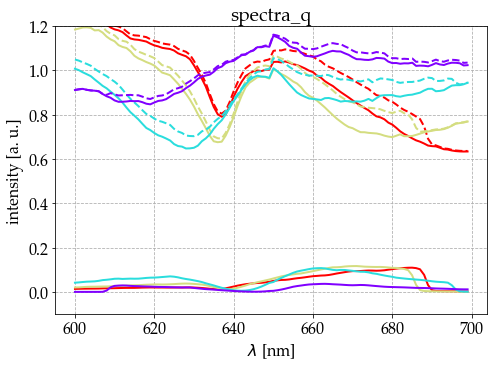

In [126]:
name = 'energies'
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')
axes.set_title('spectra_q')
axes.set_xlabel('$\\lambda$ [nm]')
axes.set_ylabel('intensity [a. u.]')
axes.set_ylim([-0.1, 1.2])

colors = cm.rainbow(np.linspace(0, 1, len(files)))

for i, file in enumerate(files):
    ci = color_order.index(data_angle[i][2,0])
    axes.plot(data_angle[i][0,:], data_angle[i][1,:], linewidth=2, label = file[-2:], color = colors[ci])
    axes.plot(data_angle[i][0,:], data_angle[i][2,:], linewidth=2, label = file[-2:], color = colors[ci])
    axes.plot(data_angle[i][0,:], data_angle[i][1,:] + data_angle[i][2,:], linewidth=2, label = file[-2:], ls = '--', color = colors[ci])
    

# lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.savefig(folder + '/' + measurement + '_' + name + '.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')   

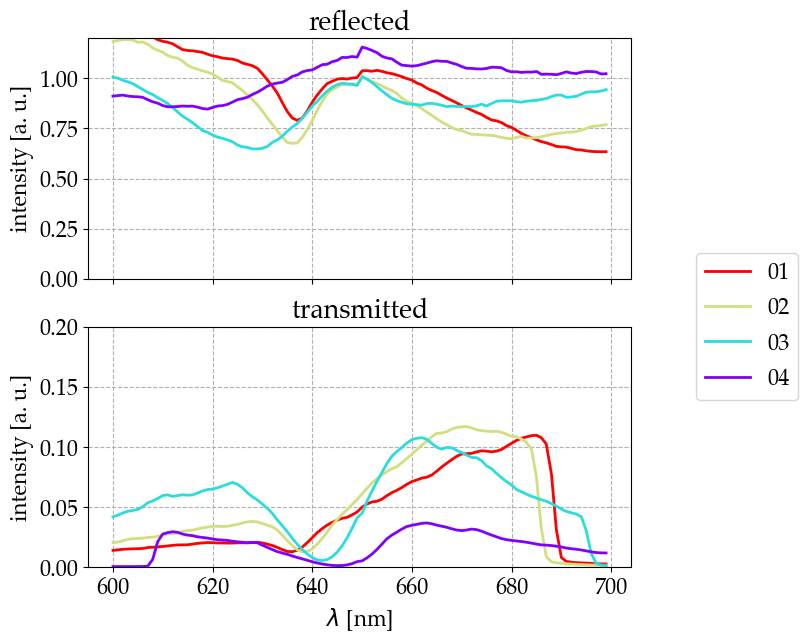

In [127]:
name = 'all_angles_splitted_orders' 
fig, axes = plt.subplots(2, 1, figsize=(7, 7), dpi=100, sharex=True)
axes[0].grid(linestyle='--')
axes[0].set_title('reflected')
# axes[0].set_xlabel('$\\lambda$ [nm]')
axes[0].set_ylabel('intensity [a. u.]')
axes[0].set_ylim([0, 1.2])

axes[1].grid(linestyle='--')
axes[1].set_title('transmitted')
axes[1].set_xlabel('$\\lambda$ [nm]')
axes[1].set_ylabel('intensity [a. u.]')
axes[1].set_ylim([0, 0.2])

colors = cm.rainbow(np.linspace(0, 1, len(files)))

for i, file in enumerate(files):
    ci = color_order.index(data_angle[i][2,0])
    axes[1].plot(data_angle[i][0, :], data_angle[i][1,:], linewidth=2, label = file[-2:], color = colors[ci])
    axes[0].plot(data_angle[i][0, :], data_angle[i][2,:], linewidth=2, label = file[-2:], color = colors[ci])

lgd = axes[0].legend(loc='center left', bbox_to_anchor=(1.1, -0.2))

fig.savefig(folder + '/' + measurement + '_' + name + '.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')   

In [128]:
1/32e3


3.125e-05